In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pickle

In [ ]:
data_dir = "/content/drive/MyDrive/data/flowers"

In [ ]:
categories = ["daisy","dandelion","rose","sunflower","tulip"]

In [ ]:
data = []
def make_data():
  for category in categories:
    path = os.path.join(data_dir,category)
    labels = categories.index(category)
    
    for img_name in os.listdir(path):
      image_path = os.path.join(path,img_name)
      image = cv.imread(image_path)
      try:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.resize(image,(224,224))
        image = np.array(image,dtype = np.float32)
        data.append([image,labels])
      #plt.imshow(image)
      #plt.show()
      except Exception as e:
           pass
  print(len(data))
    

make_data()

4323


In [ ]:
pik = open("data.pickle","wb")
pickle.dump(data,pik)
pik.close()


In [ ]:
def load_data():
  pick = open("data.pickle","rb")
  data = pickle.load(pick)
  pick.close()

  np.random.shuffle(data)
  feature =[]
  labels =[]
  
  for img,label in data:
    feature.append(img)
    labels.append(label)
  
  feature =np.array(feature,dtype =np.float32)
  labels = np.array(labels,dtype=np.float32)

  

  feature= feature /255.0
  labels = labels/255.0
  return [feature,labels]

In [ ]:
import tensorflow as tf
import numpy as np 
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
(feature,labels) =load_data()

In [ ]:
x_train,x_test,y_train, y_test =  train_test_split(feature,labels,test_size =0.1)

In [ ]:
x_train.shape

(3890, 224, 224)

In [ ]:
y_train.shape

(3890,)

In [ ]:
x_test.shape

(433, 224, 224)

In [ ]:
y_test.shape

(433,)

In [ ]:
categories = ["daisy","dandelion","rose","sunflower","tulip"]

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512,activation = "relu", input_shape=(224*224,)))
network.add(layers.Dense(256,activation = "relu"))
network.add(layers.Dense(5,activation= "softmax"))

In [ ]:
network.compile(optimizer = "rmsprop", loss ="categorical_crossentropy",
                metrics =['accuracy'])

In [ ]:
train_images = x_train.resize((3890,224*224))
train_images = x_train.astype("float32")/255

test_images =x_test.resize((433,224*224))
test_images = x_test.astype("float32")/255


print(train_images.shape)
print(test_images.shape)


(3890, 50176)
(433, 50176)


In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)


In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print(train_labels.shape)
print(test_labels.shape)


(3890, 5)
(433, 5)


In [ ]:
epochs =40
history=network.fit(train_images, train_labels, epochs =epochs, batch_size = 128)

Epoch 1/40
31/31 [==============================] - 1s 28ms/step - loss: 1.6096 - accuracy: 0.2478
Epoch 2/40
31/31 [==============================] - 1s 26ms/step - loss: 1.5391 - accuracy: 0.3103
Epoch 3/40
31/31 [==============================] - 1s 26ms/step - loss: 1.5209 - accuracy: 0.3039
Epoch 4/40
31/31 [==============================] - 1s 26ms/step - loss: 1.5081 - accuracy: 0.2971
Epoch 5/40
31/31 [==============================] - 1s 25ms/step - loss: 1.5063 - accuracy: 0.3121
Epoch 6/40
31/31 [==============================] - 1s 26ms/step - loss: 1.4951 - accuracy: 0.3175
Epoch 7/40
31/31 [==============================] - 1s 27ms/step - loss: 1.4916 - accuracy: 0.3298
Epoch 8/40
31/31 [==============================] - 1s 26ms/step - loss: 1.4674 - accuracy: 0.3663
Epoch 9/40
31/31 [==============================] - 1s 26ms/step - loss: 1.4728 - accuracy: 0.3463
Epoch 10/40
31/31 [==============================] - 1s 26ms/step - loss: 1.4664 - accuracy: 0.3505
Epoch 11/

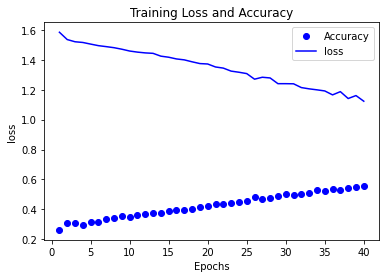

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,  len(loss) + 1)
plt.plot(epochs, accuracy, 'bo' , label = 'Accuracy')
plt.plot(epochs , loss, 'b',label = 'loss')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
network.evaluate(x_test,test_labels,verbose =1)

14/14 [==============================] - 0s 6ms/step - loss: 282.7077 - accuracy: 0.2217


[282.7077331542969, 0.2217090129852295]

In [ ]:
network.predict([x_test])

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.4816019e-22, 0.0000000e+00, 3.4374170e-26,
        9.9473467e-23],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.3139516e-16,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.6527540e-13,
        0.0000000e+00]], dtype=float32)